# MR results of GTEx and eQTLGen

In [1]:
library(readr)
library(dplyr)
library(tidyr)
library(stringr)
library(ggplot2)
library(haploR)
library(ggh4x)
library(patchwork)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




Gencode map to add gene symbols to GTEx results:

In [2]:
gencode_map <- paste("grep -v '#' ~/projects/DVA/Data/ReferenceData/gencode.gtf",
      "awk '$3==\"gene\"'",
      "cut -f9 | cut -d \";\" -f1,4",
      "sed -e 's/gene_id//g' -e 's/gene_name//g' -e 's/\"//g'",
      sep = " | ") %>%
    pipe %>%
    readr::read_delim(delim = ";", col_names = c("gene_id", "gene_name"), col_types = "cc") %>%
    mutate(across(.fn = trimws))

In [3]:
head(gencode_map)

gene_id,gene_name
<chr>,<chr>
ENSG00000223972.5,DDX11L1
ENSG00000227232.5,WASH7P
ENSG00000278267.1,MIR6859-1
ENSG00000243485.5,MIR1302-2HG
ENSG00000237613.2,FAM138A
ENSG00000268020.3,OR4G4P


HEIDI results from GTEx:

In [4]:
heidi_res <- rio::import("../data/heidi_res.tsv")
head(heidi_res)

,qtl_type,tissue,gene_id,chr,hg38_pos,tss_distance,maf,ma_samples,ma_count,slope,⋯,se.t2d,p.t2d,n.t2d,beta.smr,se.smr,p.smr,disc,padj,p.heidi.bmi,p.heidi.t2d
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,eQTL,Adipose_Subcutaneous,ENSG00000183682.7,1,39265878,-225768,0.197074,204,229,0.366948,⋯,0.0076,1.5e-23,231420,0.20711381,0.042206450,9.240453e-07,1,5.232839e-06,3.261534e-05,2.613792e-06
2,eQTL,Adipose_Subcutaneous,ENSG00000182109.7,1,39552837,6650,0.217728,218,253,0.347016,⋯,0.0074,7.2e-25,231420,0.22189179,0.038119826,5.853074e-09,1,9.875249e-08,NA,3.334901e-01
3,eQTL,Adipose_Subcutaneous,ENSG00000090621.13,1,39552837,-23953,0.217728,218,253,-0.273703,⋯,0.0074,7.2e-25,231420,-0.28132684,0.037965098,1.261624e-13,1,2.452958e-11,1.225197e-07,1.640362e-01
4,eQTL,Adipose_Subcutaneous,ENSG00000237624.1,1,39599289,84333,0.220310,220,256,0.462517,⋯,0.0075,3.8e-23,231420,0.16215620,0.025538979,2.162107e-10,1,6.587972e-09,6.684815e-09,8.469581e-03
5,eQTL,Adipose_Subcutaneous,ENSG00000115221.10,2,160262176,-9712,0.305508,296,355,-0.852696,⋯,0.0071,5.8e-11,231420,-0.05511929,0.008755235,3.062503e-10,1,8.623585e-09,1.172865e-01,9.183826e-02
6,eQTL,Adipose_Subcutaneous,ENSG00000169507.9,2,164700808,-254717,0.388124,359,451,0.279462,⋯,0.0065,2.2e-17,231420,-0.20038503,0.042127485,1.968476e-06,-1,9.291664e-06,1.887404e-05,4.969755e-09


Heterogeneity rejected for BMI and T2D at p < 0.01:

In [5]:
disc_qtl <- heidi_res %>%
    filter(disc == -1, p.heidi.t2d > 0.01, p.heidi.bmi > 0.01) %>%
    inner_join(gencode_map, by = "gene_id") %>%
    ## Changing some names
    mutate(gene_name = gsub("RP11-392O17.1", "LYPLAL1-AS1", gene_name))
print(head(data.frame(disc_qtl)))

  qtl_type                                tissue            gene_id chr
1     eQTL              Adipose_Visceral_Omentum  ENSG00000146477.5   6
2     eQTL                         Adrenal_Gland  ENSG00000228536.2   1
3     eQTL                         Artery_Tibial ENSG00000153814.11   7
4     eQTL              Brain_Frontal_Cortex_BA9  ENSG00000146477.5   6
5     eQTL Brain_Nucleus_accumbens_basal_ganglia  ENSG00000146477.5   6
6     eQTL           Brain_Putamen_basal_ganglia  ENSG00000146477.5   6
   hg38_pos tss_distance      maf ma_samples ma_count    slope  slope_se
1 160421505        73237 0.305970        229      287 0.271335 0.0293980
2 219466309         6940 0.429185        153      200 0.473795 0.0733843
3  28146272       -34471 0.457192        408      534 0.173092 0.0190881
4 160442500        94232 0.354286         97      124 0.467741 0.0673533
5 160437156        88888 0.378713        116      153 0.323968 0.0552542
6 160437156        88888 0.367647         97      125 0.41

Results from eQTLGen:

In [6]:
bloodeqtl_smrheidi <- rio::import("../data/bloodeqtl_smrheidi.tsv")

In [7]:
disc_blood <- filter(bloodeqtl_smrheidi, disc == -1, p.heidi.bmi > 0.01, p.heidi.t2d > 0.01)

In [8]:
head(disc_blood) %>% data.frame %>% print

            trait gene_name chr   min_pos   max_pos         p.exp     se.exp
1 ENSG00000070081     NUCB2  11  16729700  17853589  2.626030e-33 0.01215180
2 ENSG00000143353   LYPLAL1   1 218847186 219883684  1.492450e-12 0.01243740
3 ENSG00000146477   SLC22A3   6 160269300 161269425  1.165200e-10 0.01242050
4 ENSG00000158623     COPG2   7 129646089 130795824  1.393510e-10 0.01190900
5 ENSG00000163577    EIF5A2   3 170106204 171112081  1.265610e-17 0.01226590
6 ENSG00000173917     HOXB2  17  46118256  47120994 1.128904e-308 0.00874219
   hg19_pos n.exp   beta.exp                     id       rsid beta.bmi se.bmi
1  17372443 14260  0.1461230 eqtl-a-ENSG00000070081  rs7928810   0.0121 0.0017
2 219623621 14260  0.0879985 eqtl-a-ENSG00000143353  rs1538748   0.0094 0.0017
3 160872652 25463 -0.0800349 eqtl-a-ENSG00000146477  rs3088442   0.0093 0.0017
4 130436459 26279 -0.0764128 eqtl-a-ENSG00000158623 rs11979110   0.0089 0.0016
5 170625806 31469 -0.1048330 eqtl-a-ENSG00000163577  rs2271998   0

Joining results:

In [9]:
table_report <- bind_rows(
    transmute(disc_qtl, 
              database = "GTEx", tissue, qtl_type, 
              gene_name, 
              chr, rsid, pos = hg19_pos, ea, nea, p.qtl = pval_nominal, p.bmi, 
              beta.smr, se.smr, p.smr, p.heidi.bmi, p.heidi.t2d),
    transmute(disc_blood, 
              database = "eQTLGen", tissue = "Whole_Blood", qtl_type = "eQTL", 
              gene_name, 
              chr, pos = hg19_pos, rsid, ea, nea, p.qtl = p.exp, p.bmi, 
              beta.smr, se.smr, p.smr, p.heidi.bmi, p.heidi.t2d)
)
head(table_report)

,database,tissue,qtl_type,gene_name,chr,rsid,pos,ea,nea,p.qtl,p.bmi,beta.smr,se.smr,p.smr,p.heidi.bmi,p.heidi.t2d
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GTEx,Adipose_Visceral_Omentum,eQTL,SLC22A3,6,rs3123636,160842537,T,C,1.61261e-18,2.5e-08,-0.09950799,0.02694376,2.214729e-04,0.05936177,0.09093022
2,GTEx,Adrenal_Gland,eQTL,LYPLAL1-AS1,1,rs12030393,219639651,G,A,8.48410e-10,1.7e-08,-0.07176099,0.01733049,3.461911e-05,0.27452493,0.05158162
3,GTEx,Artery_Tibial,eQTL,JAZF1,7,rs849142,28185891,C,T,2.55547e-18,1.8e-10,-0.51995471,0.06791544,1.919433e-14,0.20248093,0.04664242
4,GTEx,Brain_Frontal_Cortex_BA9,eQTL,SLC22A3,6,rs2048327,160863532,T,C,1.45560e-10,1.1e-08,-0.05986219,0.01635295,2.515900e-04,0.10421903,0.12191744
5,GTEx,Brain_Nucleus_accumbens_basal_ganglia,eQTL,SLC22A3,6,rs2292334,160858188,G,A,2.47457e-08,2.2e-08,-0.08642829,0.02489662,5.175846e-04,0.23592609,0.21052844
6,GTEx,Brain_Putamen_basal_ganglia,eQTL,SLC22A3,6,rs2292334,160858188,G,A,4.44283e-11,2.2e-08,-0.06799896,0.01839867,2.191411e-04,0.13407478,0.18492043


In [10]:
join_res <- bind_rows(
    transmute(disc_qtl, 
              tissue, qtl_type, 
              gene_id = gsub("\\.[0-9]+$", "", gene_id), gene_name, 
              chr = paste("CHR", chr), rsid, 
              beta.qtl = slope, se.qtl = slope_se, beta.bmi, se.bmi, beta.t2d, se.t2d),
    transmute(disc_blood, 
              tissue = "Whole_Blood", qtl_type = "eQTL", 
              gene_id = trait, gene_name, 
              chr = paste("CHR", chr), rsid, 
              beta.qtl = beta.exp, se.qtl = se.exp, beta.bmi, se.bmi, beta.t2d, se.t2d)
)
head(join_res)

,tissue,qtl_type,gene_id,gene_name,chr,rsid,beta.qtl,se.qtl,beta.bmi,se.bmi,beta.t2d,se.t2d
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Adipose_Visceral_Omentum,eQTL,ENSG00000146477,SLC22A3,CHR 6,rs3123636,0.271335,0.0293980,0.0096,0.0017,-0.027,0.0067
2,Adrenal_Gland,eQTL,ENSG00000228536,LYPLAL1-AS1,CHR 1,rs12030393,0.473795,0.0733843,0.0097,0.0017,-0.034,0.0063
3,Artery_Tibial,eQTL,ENSG00000153814,JAZF1,CHR 7,rs849142,0.173092,0.0190881,0.0103,0.0016,-0.090,0.0063
4,Brain_Frontal_Cortex_BA9,eQTL,ENSG00000146477,SLC22A3,CHR 6,rs2048327,0.467741,0.0673533,0.0096,0.0017,-0.028,0.0065
5,Brain_Nucleus_accumbens_basal_ganglia,eQTL,ENSG00000146477,SLC22A3,CHR 6,rs2292334,0.323968,0.0552542,0.0094,0.0017,-0.028,0.0065
6,Brain_Putamen_basal_ganglia,eQTL,ENSG00000146477,SLC22A3,CHR 6,rs2292334,0.411771,0.0572337,0.0094,0.0017,-0.028,0.0065


In [20]:
join_res %>%
    transmute(gene_name = gsub("-AS1", "", gene_name)) %>%
    unique %>%
    tibble

gene_name
<chr>
SLC22A3
LYPLAL1
JAZF1
EIF5A2
GRB14
NCR3LG1
SLC38A11
COBLL1
SLC2A2


In [12]:
alpha <- abs(qnorm(1-0.05/2))

In [13]:
genes_plot <- join_res %>%
    pivot_longer(starts_with("beta") | starts_with("se"),
                 names_to = c(".value", "type"), names_sep = "\\.") %>%
    mutate(ci_lo = beta - (se * alpha), ci_up = beta + (se * alpha),
           across(c(beta, ci_lo, ci_up), ~ifelse(type == "t2d", exp(.x), .x)),
           nulleff = ifelse(type == "t2d", 1, 0),
           qtl_type = ifelse(type == "qtl", ifelse(qtl_type == "eQTL", "Expression",
                                                   "Splicing"), "BMI-T2D"),
           chr = factor(chr, levels = paste("CHR",
                                            rev(sort(unique(as.numeric(gsub("CHR", "", chr))))))),
           type = recode_factor(type,
                                bmi = "BMI\nSD units",
                                qtl = "Expression/Splicing\nNES",
                                t2d = "T2D\nOdds ratio")) %>%
    select(beta, tissue, gene_name, chr, qtl_type, ci_lo, ci_up, nulleff, type, rsid) %>%
    unique %>%
    ggplot(aes(beta, interaction(rsid, tissue, gene_name, chr))) +
    geom_vline(aes(xintercept = nulleff), linetype = "dashed", size = .1) +
    geom_linerange(aes(xmin = ci_lo, xmax = ci_up), size = .05) +
    geom_point(aes(color = qtl_type), size = .05) +
    scale_color_manual(breaks = c("BMI-T2D", "Expression", "Splicing"), values = c("black", "cyan4", "magenta")) +
    guides(y = "axis_nested") +
    facet_wrap(~type, scales = "free_x")

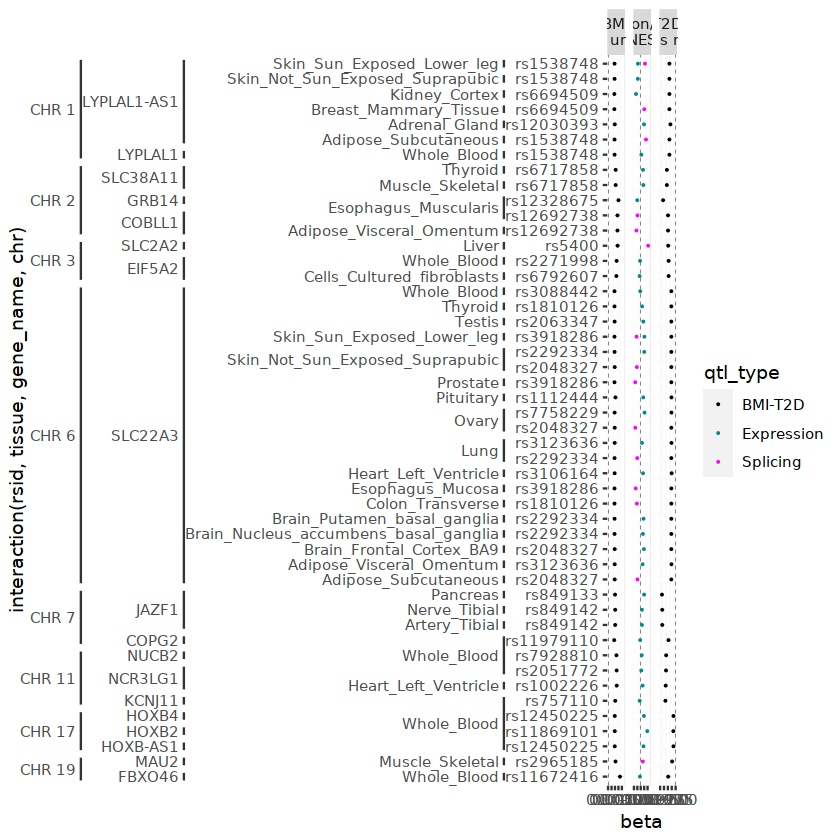

In [14]:
genes_plot

In [25]:
head(join_res)

,tissue,qtl_type,gene_id,gene_name,chr,rsid,beta.qtl,se.qtl,beta.bmi,se.bmi,beta.t2d,se.t2d
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Adipose_Visceral_Omentum,eQTL,ENSG00000146477,SLC22A3,CHR 6,rs3123636,0.271335,0.0293980,0.0096,0.0017,-0.027,0.0067
2,Adrenal_Gland,eQTL,ENSG00000228536,LYPLAL1-AS1,CHR 1,rs12030393,0.473795,0.0733843,0.0097,0.0017,-0.034,0.0063
3,Artery_Tibial,eQTL,ENSG00000153814,JAZF1,CHR 7,rs849142,0.173092,0.0190881,0.0103,0.0016,-0.090,0.0063
4,Brain_Frontal_Cortex_BA9,eQTL,ENSG00000146477,SLC22A3,CHR 6,rs2048327,0.467741,0.0673533,0.0096,0.0017,-0.028,0.0065
5,Brain_Nucleus_accumbens_basal_ganglia,eQTL,ENSG00000146477,SLC22A3,CHR 6,rs2292334,0.323968,0.0552542,0.0094,0.0017,-0.028,0.0065
6,Brain_Putamen_basal_ganglia,eQTL,ENSG00000146477,SLC22A3,CHR 6,rs2292334,0.411771,0.0572337,0.0094,0.0017,-0.028,0.0065


In [15]:
missense <- paste("tail -n+45 /ludc/Home/daniel_c/projects/DVA/Data/ReferenceData/humsavar.txt",
                  "head -n -5", 
                  "awk '{print $1\"\t\"$2\"\t\"$4\"\t\"$5\"\t\"$6}'",
                  "awk '$1 != \"-\" && $4 != \"-\"'",
                  sep = "|") %>%
    pipe %>%
    readr::read_table(col_names = c("gene_name", "uniprot_id", "aa_change", "effect", "missense_rsid"),
                      col_types = "ccccc")

In [16]:
head(missense)

gene_name,uniprot_id,aa_change,effect,missense_rsid
<chr>,<chr>,<chr>,<chr>,<chr>
A1BG,P04217,p.His52Arg,LB/B,rs893184
A1BG,P04217,p.His395Arg,LB/B,rs2241788
A1CF,Q9NQ94,p.Val555Met,LB/B,rs9073
A1CF,Q9NQ94,p.Ala558Ser,LB/B,rs11817448
A2M,P01023,p.Arg704His,LB/B,rs1800434
A2M,P01023,p.Cys972Tyr,LB/B,rs1800433


Then we need to map this to Ensembl ids so we can join this table with the hits:

In [17]:
uniprot_map <- paste("zcat /ludc/Home/daniel_c/projects/DVA/Data/ReferenceData/Uniprot_Mapping.dat.gz",
                     "awk '$2==\"Ensembl\"'", "cut -f1,3", sep = " | ") %>%
    pipe() %>%
    readr::read_tsv(col_names = c("uniprot_id", "gene_id"), col_types = "cc")

In [33]:
head(uniprot_map)

uniprot_id,gene_id
<chr>,<chr>
P31946,ENSG00000166913
P62258,ENSG00000108953
P62258,ENSG00000274474
Q04917,ENSG00000128245
P61981,ENSG00000170027
P31947,ENSG00000175793


Joining:

In [18]:
missense_res <- join_res %>%
    inner_join(uniprot_map, by = "gene_id") %>%
    inner_join(missense, by = "uniprot_id")

There is one missense mutation!

In [19]:
missense_res %>%
    filter(rsid == missense_rsid) %>%
    print

  tissue qtl_type         gene_id gene_name.x   chr   rsid beta.qtl   se.qtl
1  Liver     sQTL ENSG00000163581      SLC2A2 CHR 3 rs5400   1.0947 0.100762
  beta.bmi se.bmi beta.t2d se.t2d uniprot_id gene_name.y   aa_change effect
1   0.0138 0.0024   -0.049 0.0096     P11168      SLC2A2 p.Thr110Ile   LB/B
  missense_rsid
1        rs5400


In [ ]:
haploreg_res <- queryHaploreg(unique(join_res$rsid), ldThresh = 0.8, ldPop = "EUR", epi = "vanilla")

In [ ]:
write_tsv(haploreg_res, "~/dva/files/haploreg_res.tsv")

In [20]:
haploreg_res <- read_tsv("../data/haploreg_res.tsv", show_col_types = FALSE)
head(haploreg_res)

chr,pos_hg38,r2,D',is_query_snp,rsID,ref,alt,AFR,AMR,⋯,GENCODE_direction,GENCODE_distance,RefSeq_id,RefSeq_name,RefSeq_direction,RefSeq_distance,dbSNP_functional_annotation,query_snp_rsid,Promoter_histone_marks,Enhancer_histone_marks
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
11,17384070,1.00,1.00,1,rs1002226,C,T,0.91,0.67,⋯,3,538,NM_000525,KCNJ11,3,1177,.,rs1002226,NA,NA
11,17384070,0.93,0.99,0,rs1002226,C,T,0.91,0.67,⋯,3,538,NM_000525,KCNJ11,3,1177,.,rs2051772,NA,NA
11,17384070,0.82,0.94,0,rs1002226,C,T,0.91,0.67,⋯,3,538,NM_000525,KCNJ11,3,1177,.,rs757110,NA,NA
2,164651879,0.91,0.96,0,rs10184004,C,T,0.79,0.30,⋯,3,1744,NM_004490,GRB14,5,30028,.,rs6717858,NA,NA
2,164675944,0.83,1.00,0,rs10187501,A,G,0.71,0.27,⋯,0,0,NM_014900,COBLL1,3,8802,.,rs6717858,NA,NA
2,164656581,0.90,0.96,0,rs10195252,T,C,0.79,0.29,⋯,0,0,NM_014900,COBLL1,3,28165,.,rs6717858,NA,NA


In [21]:
disc_haploreg <- haploreg_res %>%
    select(rsid = query_snp_rsid,
           enhancer = Enhancer_histone_marks, 
           promoter = Promoter_histone_marks) %>%
    filter(enhancer != "", promoter != "") %>%
    tidyr::pivot_longer(c(enhancer, promoter), names_to = "marker_type", values_to = "tissue2") %>%
    tidyr::separate_rows(tissue2, sep = ",") %>%
    mutate(across(.fns = trimws)) %>%
    select(rsid, tissue2) %>%
    unique
head(disc_haploreg)

rsid,tissue2
<chr>,<chr>
rs11869101,ESC
rs11869101,ESDR
rs11869101,LNG
rs11869101,IPSC
rs11869101,BLD
rs11869101,SKIN


In [85]:
disc_haploreg %>%
    filter(grepl("rs153", rsid))

rsid,tissue2
<chr>,<chr>
rs1538748,BLD
rs1538748,FAT
rs1538748,SKIN
rs1538748,STRM
rs1538748,BONE
rs1538748,LNG
rs1538748,GI
rs1538748,ESDR
rs1538748,BRST


In [22]:
genes_tpm <- readr::read_tsv("~/projects/DVA/Data/GTEx/gtex_genes_tpm.gct.gz", comment = "#", skip = 2, show_col_types = FALSE) %>%
    rename_with(~gsub("-|\\(|\\)", "", .x)) %>%
    rename_with(~gsub(" +", "_", .x)) %>%
    pivot_longer(-c(Name, Description), names_to = "tissue", values_to = "ntpm") %>%
    group_by(Name) %>%
    mutate(ntpm = ntpm/sum(ntpm)) %>%
    ungroup %>%
    rename(gene_id = Name, gene_name = Description) %>%
    mutate(gene_id = gsub("\\.[0-9]+$", "", gene_id))
head(genes_tpm)

gene_id,gene_name,tissue,ntpm
<chr>,<chr>,<chr>,<dbl>
ENSG00000223972,DDX11L1,Adipose_Subcutaneous,0
ENSG00000223972,DDX11L1,Adipose_Visceral_Omentum,0
ENSG00000223972,DDX11L1,Adrenal_Gland,0
ENSG00000223972,DDX11L1,Artery_Aorta,0
ENSG00000223972,DDX11L1,Artery_Coronary,0
ENSG00000223972,DDX11L1,Artery_Tibial,0


In [50]:
unique(genes_tpm$tissue)

[1] "Adipose_Subcutaneous"                 
 [2] "Adipose_Visceral_Omentum"             
 [3] "Adrenal_Gland"                        
 [4] "Artery_Aorta"                         
 [5] "Artery_Coronary"                      
 [6] "Artery_Tibial"                        
 [7] "Bladder"                              
 [8] "Brain_Amygdala"                       
 [9] "Brain_Anterior_cingulate_cortex_BA24" 
[10] "Brain_Caudate_basal_ganglia"          
[11] "Brain_Cerebellar_Hemisphere"          
[12] "Brain_Cerebellum"                     
[13] "Brain_Cortex"                         
[14] "Brain_Frontal_Cortex_BA9"             
[15] "Brain_Hippocampus"                    
[16] "Brain_Hypothalamus"                   
[17] "Brain_Nucleus_accumbens_basal_ganglia"
[18] "Brain_Putamen_basal_ganglia"          
[19] "Brain_Spinal_cord_cervical_c1"        
[20] "Brain_Substantia_nigra"               
[21] "Breast_Mammary_Tissue"                
[22] "Cells_Cultured_fibroblasts"           
[23] "Cells_EBVtransformed_lymphocytes"     
[24] "Cervix_Ectocervix"                    
[25] "Cervix_Endocervix"                    
[26] "Colon_Sigmoid"                        
[27] "Colon_Transverse"                     
[28] "Esophagus_Gastroesophageal_Junction"  
[29] "Esophagus_Mucosa"                     
[30] "Esophagus_Muscularis"                 
[31] "Fallopian_Tube"                       
[32] "Heart_Atrial_Appendage"               
[33] "Heart_Left_Ventricle"                 
[34] "Kidney_Cortex"                        
[35] "Kidney_Medulla"                       
[36] "Liver"                                
[37] "Lung"                                 
[38] "Minor_Salivary_Gland"                 
[39] "Muscle_Skeletal"                      
[40] "Nerve_Tibial"                         
[41] "Ovary"                                
[42] "Pancreas"                             
[43] "Pituitary"                            
[44] "Prostate"                             
[45] "Skin_Not_Sun_Exposed_Suprapubic"      
[46] "Skin_Sun_Exposed_Lower_leg"           
[47] "Small_Intestine_Terminal_Ileum"       
[48] "Spleen"                               
[49] "Stomach"                              
[50] "Testis"                               
[51] "Thyroid"                              
[52] "Uterus"                               
[53] "Vagina"                               
[54] "Whole_Blood"

In [53]:
join_res$tissue %>% unique

[1] "Adipose_Visceral_Omentum"             
 [2] "Adrenal_Gland"                        
 [3] "Artery_Tibial"                        
 [4] "Brain_Frontal_Cortex_BA9"             
 [5] "Brain_Nucleus_accumbens_basal_ganglia"
 [6] "Brain_Putamen_basal_ganglia"          
 [7] "Cells_Cultured_fibroblasts"           
 [8] "Esophagus_Muscularis"                 
 [9] "Heart_Left_Ventricle"                 
[10] "Kidney_Cortex"                        
[11] "Lung"                                 
[12] "Muscle_Skeletal"                      
[13] "Nerve_Tibial"                         
[14] "Ovary"                                
[15] "Pancreas"                             
[16] "Pituitary"                            
[17] "Skin_Not_Sun_Exposed_Suprapubic"      
[18] "Skin_Sun_Exposed_Lower_leg"           
[19] "Testis"                               
[20] "Thyroid"                              
[21] "Adipose_Subcutaneous"                 
[22] "Breast_Mammary_Tissue"                
[23] "Colon_Transverse"                     
[24] "Esophagus_Mucosa"                     
[25] "Liver"                                
[26] "Prostate"                             
[27] "Whole_Blood"

In [49]:
disc_haploreg$tissue2 %>% unique

[1] "ESC"   "ESDR"  "LNG"   "IPSC"  "BLD"   "SKIN"  "GI"    "PLCNT" "FAT"  
[10] "STRM"  "MUS"   "BONE"  "BRST"  "ADRL"  "PANC"  "HRT"   "SPLN"  "CRVX" 
[19] "LIV"   "VAS"   "BRN"   "THYM"  "KID"   "OVRY"

In [23]:
tissue_dict <- tibble::tribble(
    ~tissue, ~tissue2,
    "Adipose_Visceral_Omentum", "FAT",
    "Adrenal_Gland", "ADRL",
    "Artery_Tibial", "VAS",
    "Brain_Frontal_Cortex_BA9", "BRN",
    "Brain_Nucleus_accumbens_basal_ganglia", "BRN",
    "Brain_Putamen_basal_ganglia", "BRN",
    "Cells_Cultured_fibroblasts", "STRM",
    "Esophagus_Muscularis", "GI",
    "Heart_Left_Ventricle", "HRT",
    "Kidney_Cortex", "KID",
    "Lung", "LNG",
    "Liver", "LIV",
    "Muscle_Skeletal", "MUS",
    "Ovary", "OVRY",
    "Pancreas", "PANC",
    "Pituitary", "BRN",
    "Skin_Not_Sun_Exposed_Suprapubic", "SKIN",
    "Skin_Sun_Exposed_Lower_leg", "SKIN",
    "Adipose_Subcutaneous", "FAT",
    "Breast_Mammary_Tissue", "BRST",
    "Colon_Transverse", "GI",
    "Esophagus_Mucosa", "GI",
    "Whole_Blood", "BLD" 
)

In [24]:
epigen_annot <- join_res %>%
    select(rsid, gene_id, tissue) %>%
    unique %>%
    inner_join(tissue_dict, by = "tissue")  %>%
    inner_join(genes_tpm, by = c("gene_id", "tissue")) %>%
    inner_join(disc_haploreg, by = c("rsid", "tissue2")) %>%
    mutate(weight = (1*!is.na(tissue2)) + ntpm, gene_name = gsub("RP11-392O17.1", "LYPLAL1-AS1", gene_name)) %>%
    arrange(gene_id, desc(weight))
epigen_annot

rsid,gene_id,tissue,tissue2,gene_name,ntpm,weight
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
rs7928810,ENSG00000070081,Whole_Blood,BLD,NUCB2,4.638761e-03,1.004639
rs12328675,ENSG00000115290,Esophagus_Muscularis,GI,GRB14,1.289442e-02,1.012894
rs2965185,ENSG00000129933,Muscle_Skeletal,MUS,MAU2,1.695070e-02,1.016951
rs1538748,ENSG00000143353,Whole_Blood,BLD,LYPLAL1,3.674694e-03,1.003675
rs7758229,ENSG00000146477,Ovary,OVRY,SLC22A3,4.221538e-02,1.042215
rs2048327,ENSG00000146477,Ovary,OVRY,SLC22A3,4.221538e-02,1.042215
rs2292334,ENSG00000146477,Skin_Not_Sun_Exposed_Suprapubic,SKIN,SLC22A3,1.812792e-02,1.018128
rs2048327,ENSG00000146477,Skin_Not_Sun_Exposed_Suprapubic,SKIN,SLC22A3,1.812792e-02,1.018128
rs3918286,ENSG00000146477,Skin_Sun_Exposed_Lower_leg,SKIN,SLC22A3,1.741819e-02,1.017418


In [25]:
score_dat <- data.frame(label = ggplot_build(genes_plot)$layout$panel_params[[1]]$y$scale$range$range) %>%
    mutate(label = factor(label, levels = label)) %>%
    separate(label, c("rsid", "tissue", "gene_name"), sep = "\\.", remove = FALSE, extra = "drop") %>%
    left_join(epigen_annot) %>%
    mutate(weight = log(ifelse(rsid == "rs5400", 1.15, weight)),
           measure = "Log (score)")
head(score_dat)

Joining, by = c("rsid", "tissue", "gene_name")


,label,rsid,tissue,gene_name,gene_id,tissue2,ntpm,weight,measure
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,rs11672416.Whole_Blood.FBXO46.CHR 19,rs11672416,Whole_Blood,FBXO46,NA,NA,NA,NA,Log (score)
2,rs2965185.Muscle_Skeletal.MAU2.CHR 19,rs2965185,Muscle_Skeletal,MAU2,ENSG00000129933,MUS,0.0169507043,0.0168086443,Log (score)
3,rs12450225.Whole_Blood.HOXB-AS1.CHR 17,rs12450225,Whole_Blood,HOXB-AS1,ENSG00000230148,BLD,0.0042502322,0.0042412255,Log (score)
4,rs11869101.Whole_Blood.HOXB2.CHR 17,rs11869101,Whole_Blood,HOXB2,ENSG00000173917,BLD,0.0029727532,0.0029683433,Log (score)
5,rs12450225.Whole_Blood.HOXB4.CHR 17,rs12450225,Whole_Blood,HOXB4,ENSG00000182742,BLD,0.0017578752,0.0017563319,Log (score)
6,rs757110.Whole_Blood.KCNJ11.CHR 11,rs757110,Whole_Blood,KCNJ11,ENSG00000187486,BLD,0.0002160022,0.0002159788,Log (score)


In [61]:
score_dat %>%
    select(rsid, tissue, gene_name, weight) %>%
    right_join(table_report) %>%
    write_tsv("../data/qtl_report")

Joining, by = c("rsid", "tissue", "gene_name")


Warning message:
"Removed 15 rows containing missing values (position_stack)."


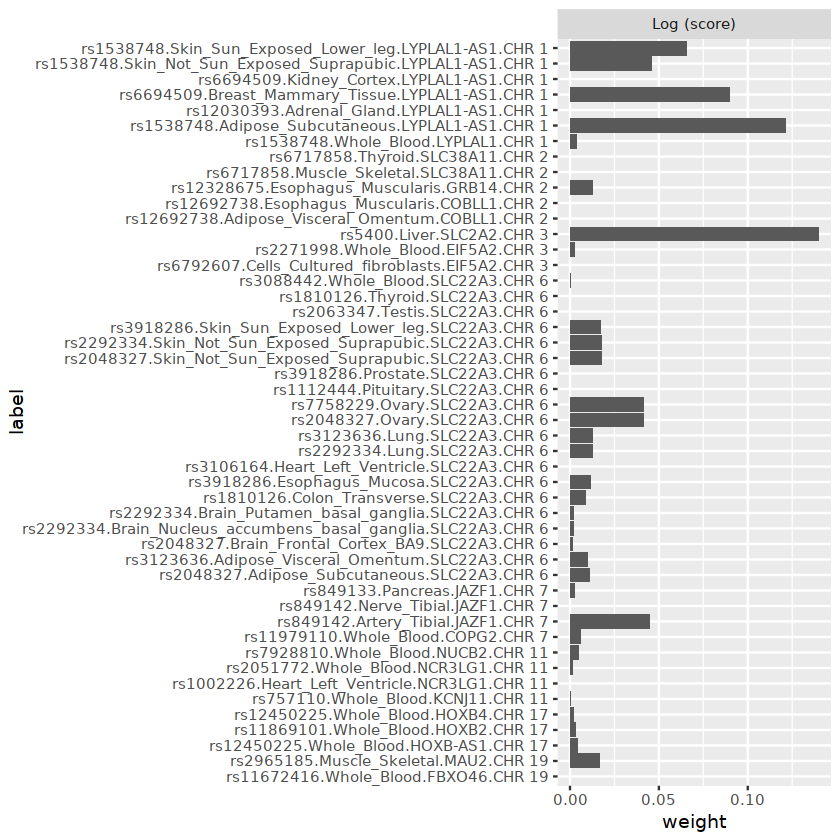

In [26]:
score_plot <- score_dat %>%
    ggplot(aes(weight, label)) +
    geom_col() +
    facet_wrap(~measure)
score_plot

In [27]:
options(repr.plot.width = 10, repr.plot.height = 10)
signif_coloc_plot <- genes_plot + 
    theme_bw() +
    labs(y = " \n ") +
    theme(axis.title.x = element_blank(),
          axis.text.y = element_text(size = 8),
          axis.text.x = element_text(angle = 45, hjust = 1, size = 6),
          legend.position = "top", legend.title = element_blank()) +
    (score_plot + 
         theme_classic() +
         theme(axis.text.y = element_blank(),
               axis.text.x = element_text(angle = 45, hjust = 1, size = 6),
               axis.title = element_blank())) +
    plot_layout(widths = c(.75,.25), guides = "collect") &
    theme(legend.position = "top", legend.title = element_blank())

In [29]:
save(signif_coloc_plot, file = "../plots/signif_coloc.RData")

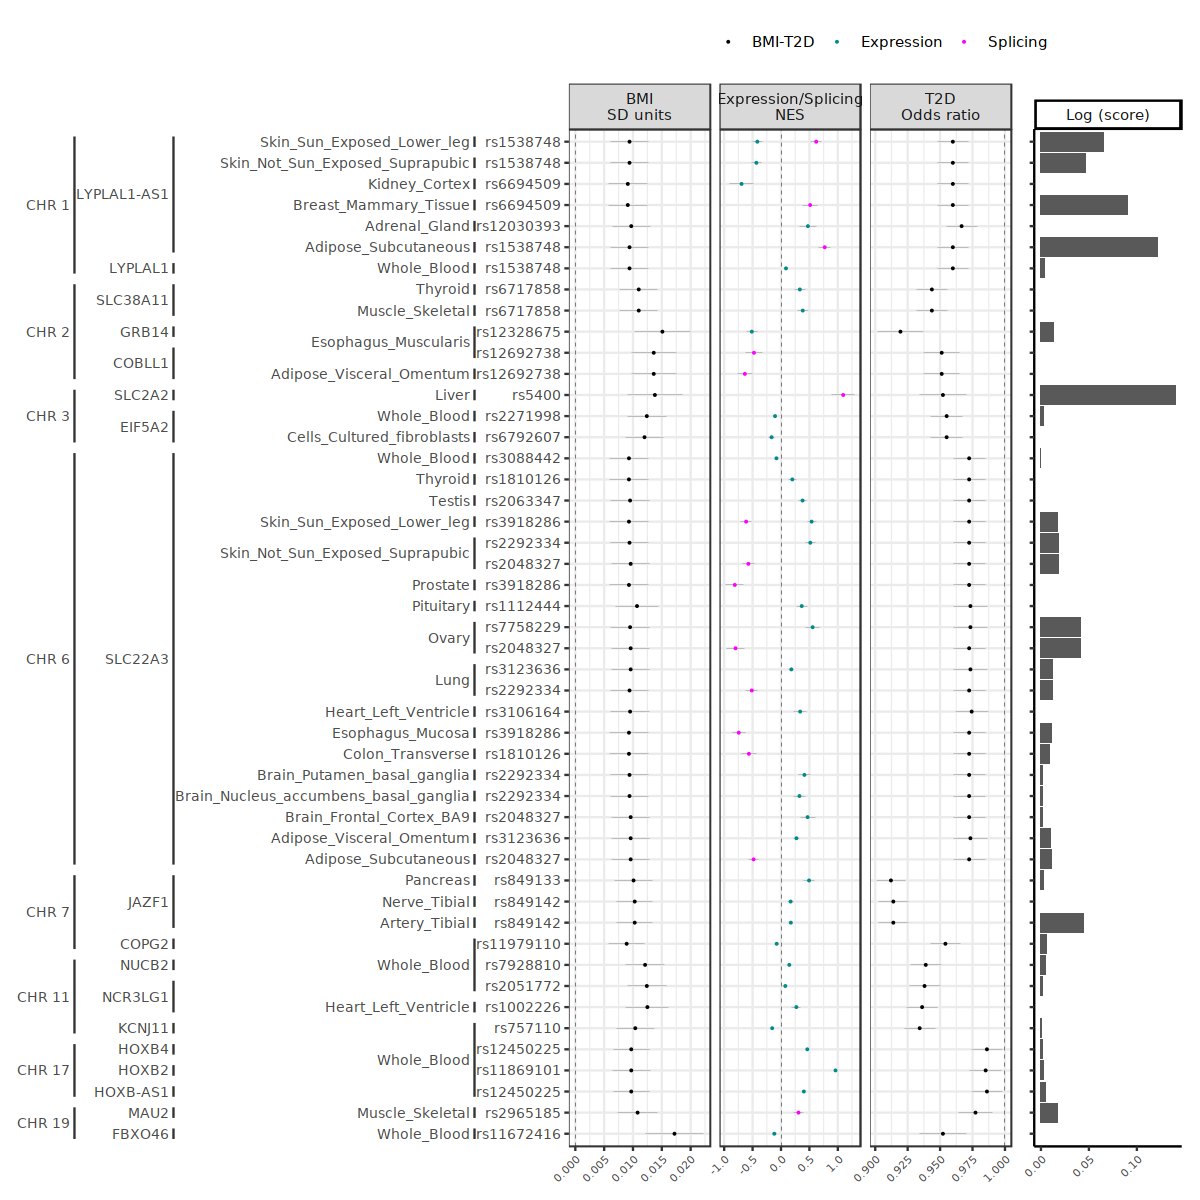

In [28]:
suppressWarnings(print(signif_coloc_plot))